<a href="https://colab.research.google.com/github/ricardoruedas/ML/blob/main/%5B05%5D%20-%20Arboles%20de%20decision/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arboles de decisión: Random Forest - Ejercicio 1: Random_Forest.ipynb

Este notebook es un **I do**: todo resuelto y explicado paso a paso.

## Objetivos

- Cargar y explorar el dataset Iris.
- Entrena un Random Forest con 100 árboles de decisión.
- Evalúa el modelo con métricas de clasificación (accuracy, matriz de confusión y reporte).
- Muestra la importancia de cada característica (qué variables usa más el modelo para decidir).

Ejemplo: Random Forest con Iris (Clasificación)

3 tipos de flores de iris (Iris setosa, Iris versicolor e Iris virginica)

De cada flor tenemos 4 datos
Sepal length (longitud del sépalo)

Sepal width (ancho del sépalo)

Petal length (longitud del pétalo)

Petal width (ancho del pétalo)

Qué hace este ejemplo:

*   Entrena un Random Forest con 100 árboles de decisión.
*   Evalúa el modelo con métricas de clasificación (accuracy, matriz de confusión y reporte).
*   Muestra la importancia de cada característica (qué variables usa más el modelo para decidir).



## Descripción del dataset

El dataset Iris contiene 150 muestras de flores de tres especies (setosa, versicolor, virginica) con 4 características: sepal length, sepal width, petal length y petal width. Es ideal para explicar conceptos de clasificación y visualizar fronteras de decisión.

In [1]:
# Requisitos: scikit-learn, matplotlib (pip install scikit-learn matplotlib)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1) Cargar datos
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names


## 2) Exploración rápida y visualización

Dimensiones: (150, 4)

Primeras 5 filas del dataset:
Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Muestra 1: [5.1 3.5 1.4 0.2]
Muestra 2: [4.9 3.  1.4 0.2]
Muestra 3: [4.7 3.2 1.3 0.2]
Muestra 4: [4.6 3.1 1.5 0.2]
Muestra 5: [5.  3.6 1.4 0.2]

Clases: [0 1 2]
Nombres de las clases: ['setosa' 'versicolor' 'virginica']

Distribución por clase:
setosa: 50 muestras
versicolor: 50 muestras
virginica: 50 muestras

Estadísticas descriptivas:
Característica       Media      Min        Max        Std       
------------------------------------------------------------
sepal length (cm)    5.84       4.30       7.90       0.83      
sepal width (cm)     3.06       2.00       4.40       0.43      
petal length (cm)    3.76       1.00       6.90       1.76      
petal width (cm)     1.20       0.10       2.50       0.76      

Información del dataset:
- Número de muestras: 150
- Número de características: 4
- Características: sepal length (cm),

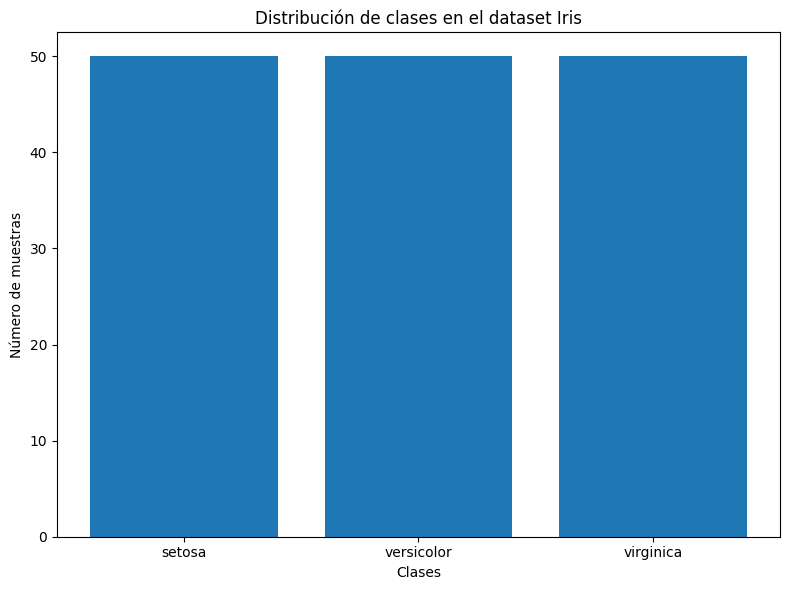

In [2]:
#Usaremos numpy, es mejor usar panda, pero ya lo visteis en el ejercicio de "Supervisados_Alternativos_Ejercicio_1_KNN_IRIS.ipynb"
print('Dimensiones:', X.shape)

print('\nPrimeras 5 filas del dataset:')
print('Características:', feature_names)
for i in range(5):
    print(f"Muestra {i+1}: {X[i]}")

print('\nClases:', np.unique(y))
print('Nombres de las clases:', target_names)

print('\nDistribución por clase:')
unique, counts = np.unique(y, return_counts=True)
for i, (clase, count) in enumerate(zip(unique, counts)):
    print(f"{target_names[clase]}: {count} muestras")

print('\nEstadísticas descriptivas:')
print(f"{'Característica':<20} {'Media':<10} {'Min':<10} {'Max':<10} {'Std':<10}")
print("-" * 60)
for i, feature in enumerate(feature_names):
    mean_val = np.mean(X[:, i])
    min_val = np.min(X[:, i])
    max_val = np.max(X[:, i])
    std_val = np.std(X[:, i])
    print(f"{feature:<20} {mean_val:<10.2f} {min_val:<10.2f} {max_val:<10.2f} {std_val:<10.2f}")

print('\nInformación del dataset:')
print(f"- Número de muestras: {X.shape[0]}")
print(f"- Número de características: {X.shape[1]}")
print(f"- Características: {', '.join(feature_names)}")
print(f"- Clases objetivo: {', '.join(target_names)}")

# Visualización de la distribución
plt.figure(figsize=(8, 6))
plt.bar(target_names, counts)
plt.title('Distribución de clases en el dataset Iris')
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.tight_layout()
plt.show()

## 3) Dividimos el train y el test


In [3]:
# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

## 4) Cargamos el Random Forest

In [4]:
# 3) Definir y entrenar Random Forest
rf = RandomForestClassifier(
    n_estimators=100,   # número de árboles (común: 100–500)
    max_depth=None,     # deja crecer los árboles completos
    random_state=42,
    bootstrap=True      # bagging activado (sampleo con reemplazo)
)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5) Evaluación de resultados

In [5]:
# 5) Evaluación de resultados
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.921

Matriz de confusión:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



## 6) Importancia de características

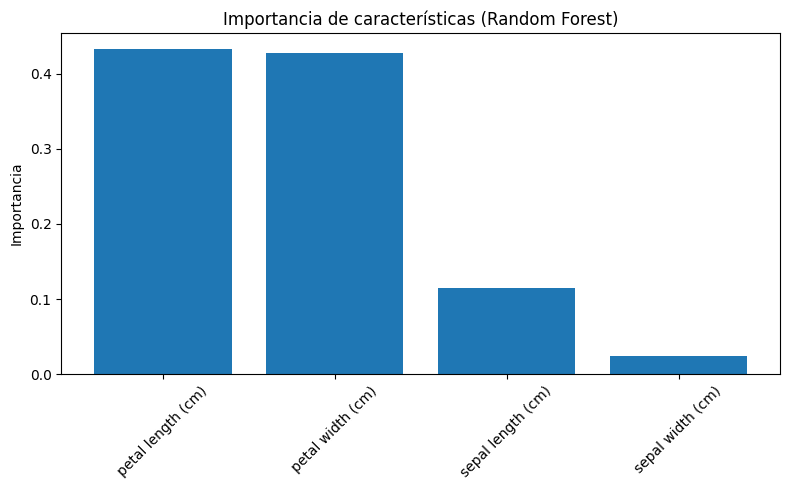

In [6]:
# 6) Importancia de características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importancia")
plt.title("Importancia de características (Random Forest)")
plt.tight_layout()
plt.show()


## 7) Conclusión
- Random Forest es un algoritmo sencillo e intuitivo en este ejemplo no vemos aún como optimizar los hiperparametros.